In [34]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

from pathlib import Path

# Machine Learning 
## Nombre: José Luis Narváez Bolaños

In [35]:
#definir las rutas de los directorios
current_dir=Path('.').resolve()
#devuelve a la carpeta madre del directorio
project_dir=Path(current_dir).parent

In [36]:
query="""
    SELECT 
      *
    FROM 
      `bigquery-public-data.chicago_taxi_trips.taxi_trips` 
    LIMIT 1000
"""

df=pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


# Explore your data

In [37]:
numerics=['int16','int32', 'int64','float16','float32','float64']

num_df=df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [38]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


# One-dimensional data

Plot histogram and box diagram for all variables in the dataset.
## Solution

First, the function is generated to plot each of the relationships between the variables and save the respective images.

In [39]:
def data_graphics(data, col, plot_name):
 # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 # assigning a graph to each ax
    sns.boxplot(num_df[col], ax=ax_box)
    sns.histplot(data=num_df, x=col, bins=30, ax=ax_hist)
 # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.suptitle(plot_name)
    ax_hist.grid()
    plot_path = os.path.join(project_dir, 'reports', 'plots', plot_name)
    f.savefig(plot_path)

Then, the for cycle is generated to graph each.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


pickup_census_tract only contains null values
dropoff_census_tract only contains null values
pickup_community_area only contains null values
dropoff_community_area only contains null values


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

pickup_latitude only contains null values
pickup_longitude only contains null values
dropoff_latitude only contains null values
dropoff_longitude only contains null values


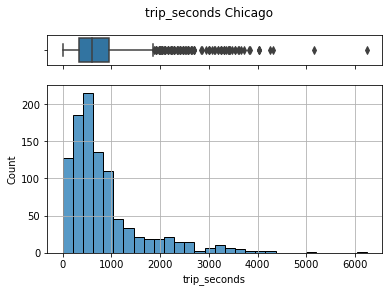

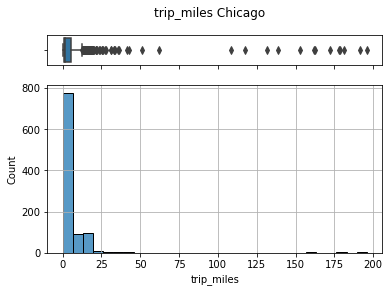

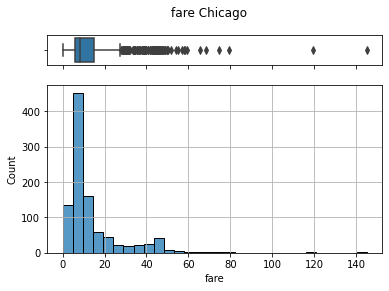

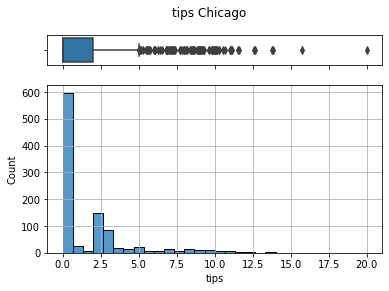

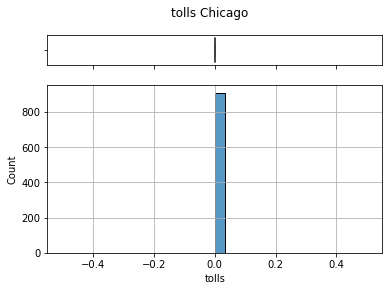

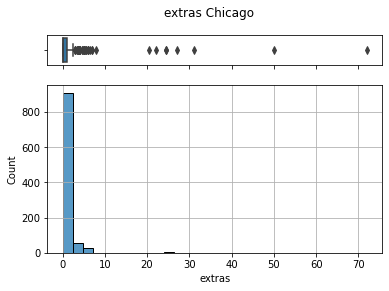

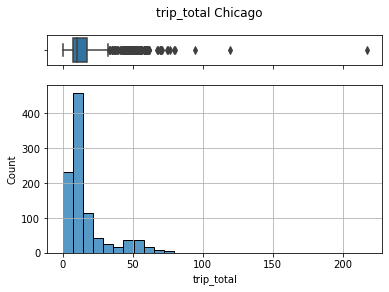

In [40]:
for c in num_df:
    if num_df[c].isna().sum()==len(num_df):
        print('{} only contains null values'.format(c))
        continue
    try:
        data_graphics(
            data=num_df,
            col=c,
            plot_name= c+ '' + ' Chicago'
        )
    except:
        print('Unable to graph'.format(c));   

# Two dimensional

Study correlation between trip_seconds and the rest of numerical variables
# Solution
Graphs are generated, interpreting the relationship between "trip_seconds" and the other variables.

pickup_census_tract only contains null values
dropoff_census_tract only contains null values
pickup_community_area only contains null values
dropoff_community_area only contains null values
pickup_latitude only contains null values
pickup_longitude only contains null values
dropoff_latitude only contains null values
dropoff_longitude only contains null values


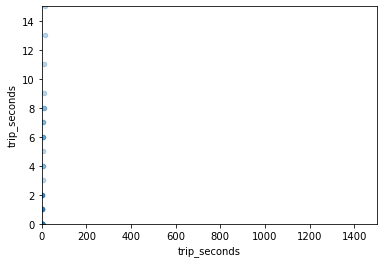

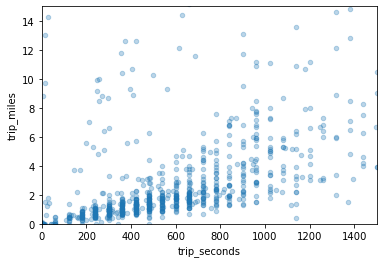

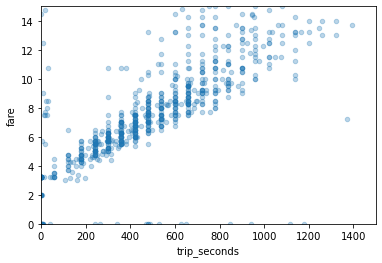

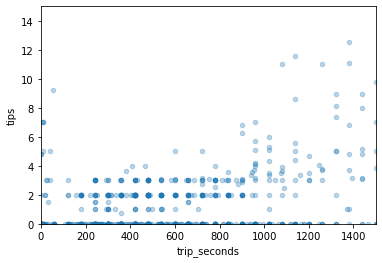

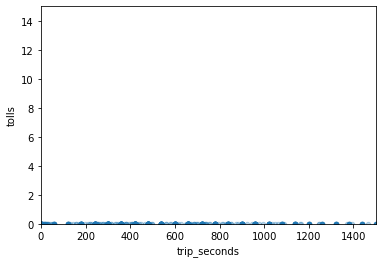

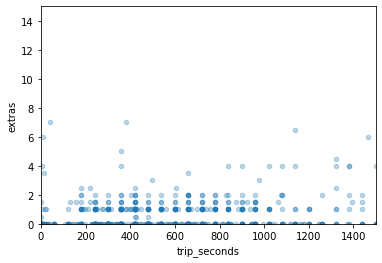

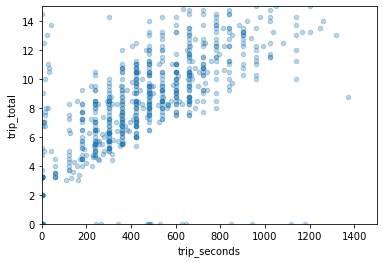

In [41]:
for c in num_df:
    if num_df[c].isna().sum()==len(num_df):
        print('{} only contains null values'.format(c))
        continue
    try:
        num_df.plot(kind='scatter', x='trip_seconds', y=c, alpha=0.3)
        plt.xlim(0,1500)
        plt.ylim(0,15)
    except:
        print('Unable to graph'.format(c))

Then the correlation is made between "trip_seconds" and the corresponding numeric variables.

In [42]:
for c in num_df:
    if num_df[c].isna().sum()==len(num_df):
        print('{} only contains null values'.format(c))
        continue
    try:
        x='trip_seconds'
        y= c
        display(num_df[[x,y]].corr())
    except:
        print('Unable to graph'.format(c)); 

,trip_seconds,trip_seconds
trip_seconds,1.0,1.0
trip_seconds,1.0,1.0


,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


pickup_census_tract only contains null values
dropoff_census_tract only contains null values
pickup_community_area only contains null values
dropoff_community_area only contains null values


,trip_seconds,fare
trip_seconds,1.000000,0.811545
fare,0.811545,1.000000


,trip_seconds,tips
trip_seconds,1.000000,0.465293
tips,0.465293,1.000000


,trip_seconds,tolls
trip_seconds,1.0,NaN
tolls,NaN,NaN


,trip_seconds,extras
trip_seconds,1.000000,0.223759
extras,0.223759,1.000000


,trip_seconds,trip_total
trip_seconds,1.000000,0.777201
trip_total,0.777201,1.000000


pickup_latitude only contains null values
pickup_longitude only contains null values
dropoff_latitude only contains null values
dropoff_longitude only contains null values


Finally the same procedure is performed but applying Log-Transform as graphs as correlations.

pickup_census_tract only contains null values
dropoff_census_tract only contains null values
pickup_community_area only contains null values
dropoff_community_area only contains null values
pickup_latitude only contains null values
pickup_longitude only contains null values
dropoff_latitude only contains null values
dropoff_longitude only contains null values


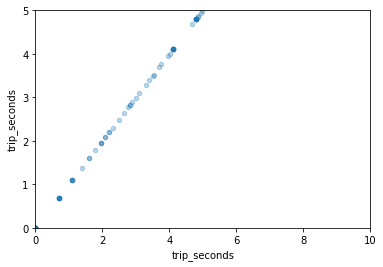

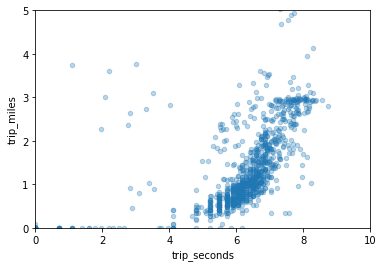

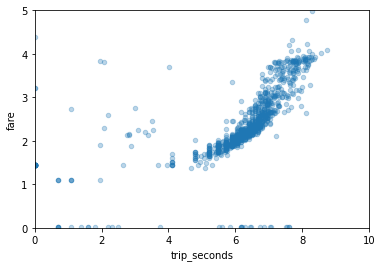

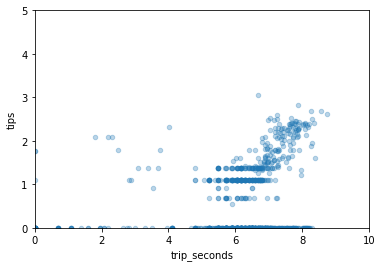

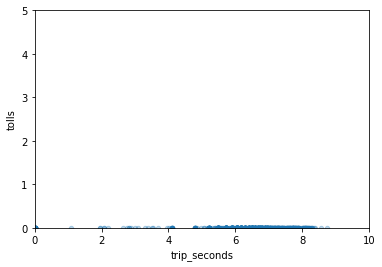

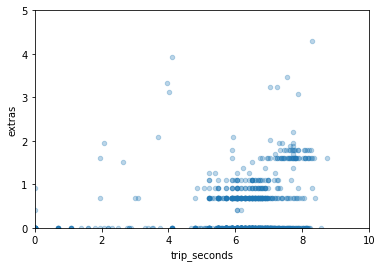

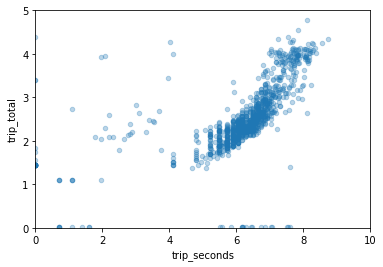

In [43]:
for c in num_df:
    if num_df[c].isna().sum()==len(num_df):
        print('{} only contains null values'.format(c))
        continue
    try:
        np.log(num_df+1).plot(kind='scatter', x='trip_seconds', y=c, alpha=0.3)
        plt.xlim(0,10)
        plt.ylim(0,5)
    except:
        print('Unable to graph'.format(c))

In [44]:
for c in num_df:
    if num_df[c].isna().sum()==len(num_df):
        print('{} only contains null values'.format(c))
        continue
    try:
        x='trip_seconds'
        y= c
        display(np.log(num_df[[x,y]]+1).corr())
    except:
        print('Unable to graph'.format(c)); 

,trip_seconds,trip_seconds
trip_seconds,1.0,1.0
trip_seconds,1.0,1.0


,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


pickup_census_tract only contains null values
dropoff_census_tract only contains null values
pickup_community_area only contains null values
dropoff_community_area only contains null values


,trip_seconds,fare
trip_seconds,1.000000,0.603068
fare,0.603068,1.000000


,trip_seconds,tips
trip_seconds,1.000000,0.259486
tips,0.259486,1.000000


,trip_seconds,tolls
trip_seconds,1.0,NaN
tolls,NaN,NaN


,trip_seconds,extras
trip_seconds,1.000000,0.219694
extras,0.219694,1.000000


,trip_seconds,trip_total
trip_seconds,1.000000,0.585017
trip_total,0.585017,1.000000


pickup_latitude only contains null values
pickup_longitude only contains null values
dropoff_latitude only contains null values
dropoff_longitude only contains null values


Conclusion: To the variables "trip_miles", "trips" and "extras" is performed Log-Transform; since its correlation improves considerably, but the others are left static because its correlation is better without altering it.

# Many Variables

Build a heat map and scattermatrix, with numeric variables transformed into logarithm.
# Solution 
Build the scattermatrix between the variables and their Log-Transform respectively.

**Before**

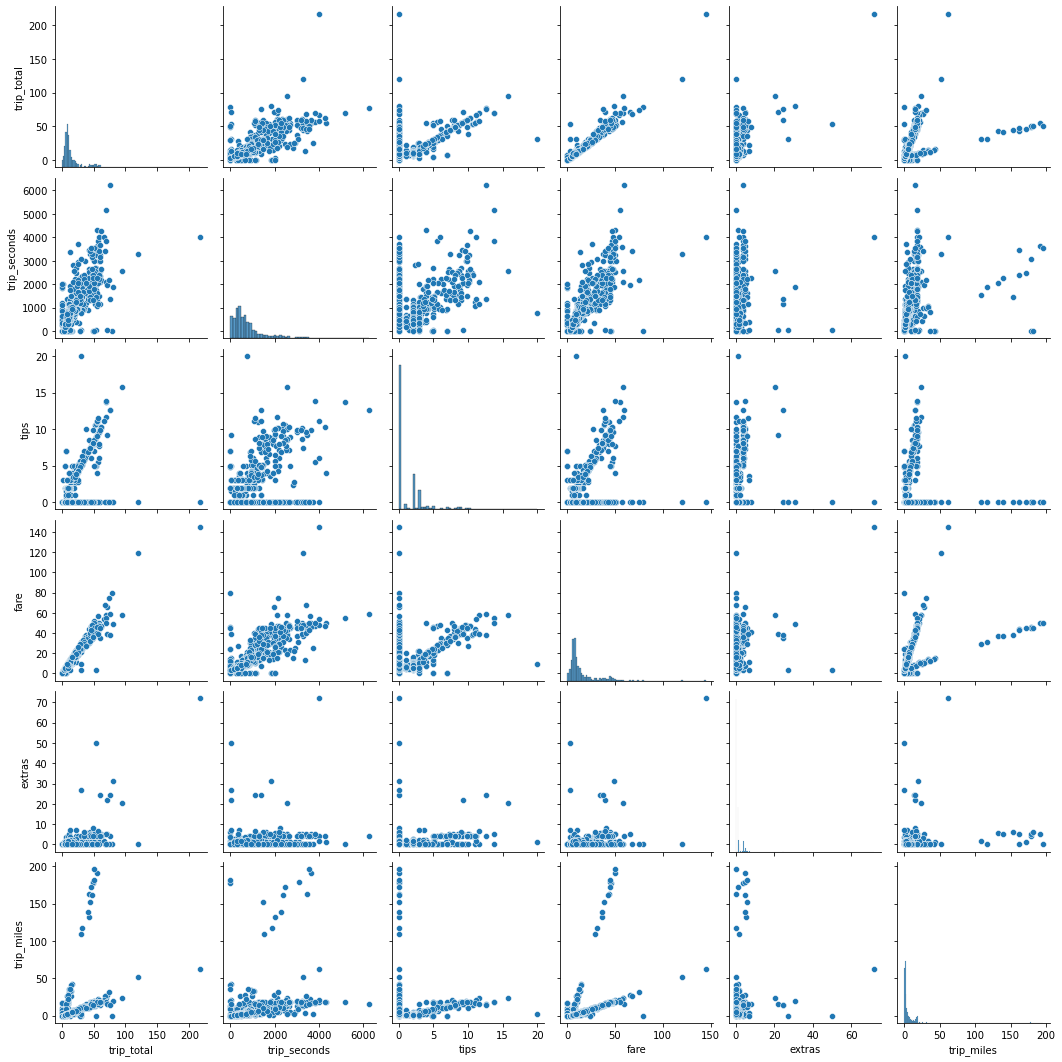

In [45]:
cols=['trip_total','trip_seconds','tips','fare','extras','trip_miles']
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

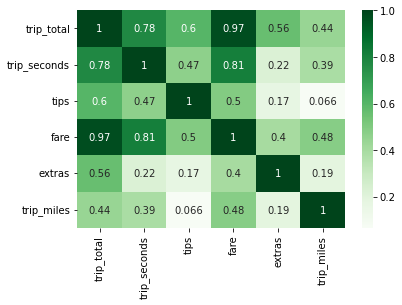

In [46]:
correlations=num_df[cols].corr()
sns.heatmap(correlations,cmap='Greens',annot=True)

**After**

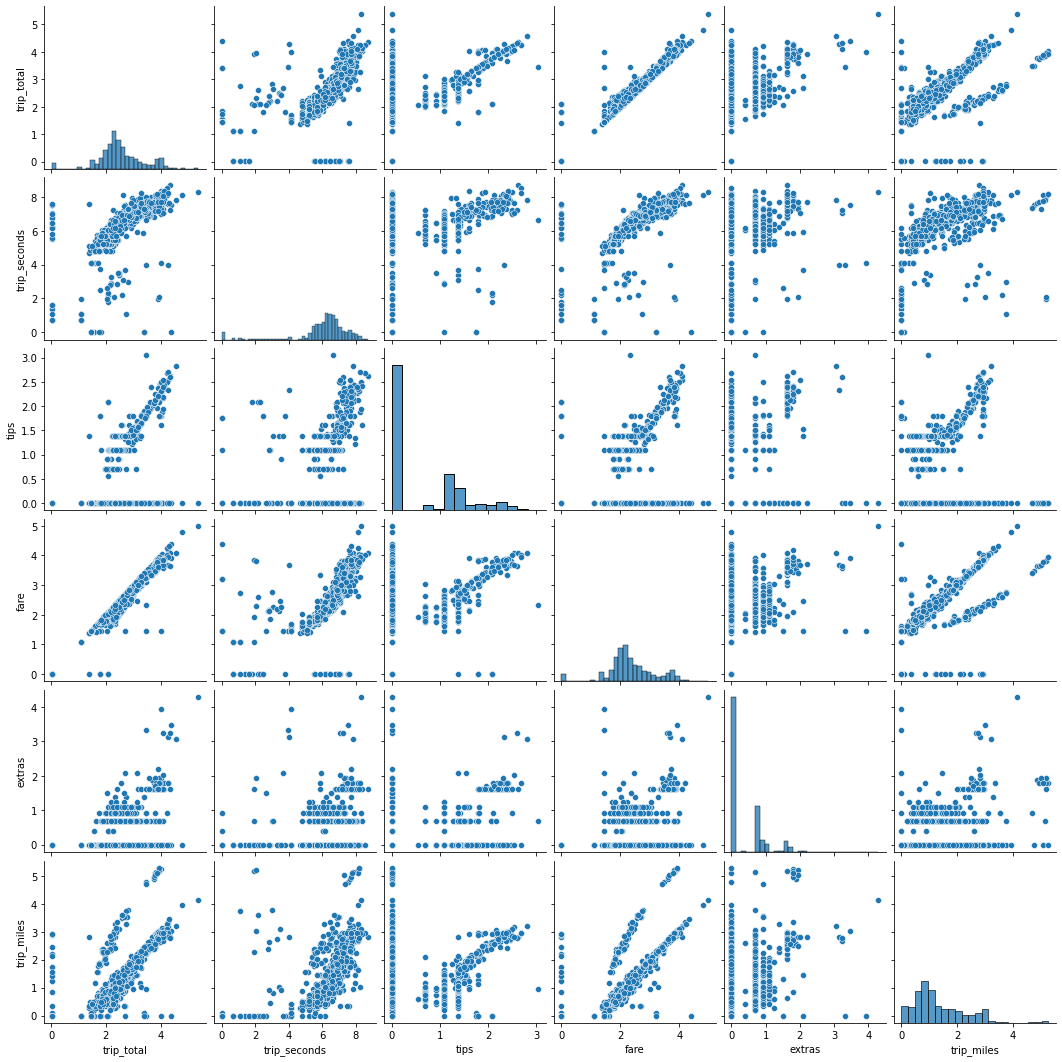

In [47]:
cols=['trip_total','trip_seconds','tips','fare','extras','trip_miles']
sns.pairplot(data=np.log(num_df[cols]+1))

<AxesSubplot:>

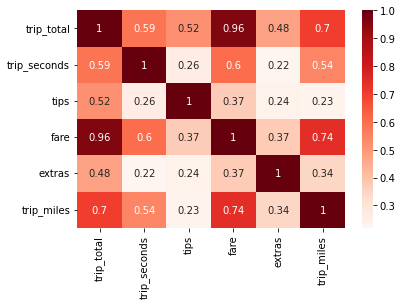

In [48]:
correlations1=np.log(num_df[cols]+1).corr()
sns.heatmap(correlations1,cmap='Reds',annot=True)

# Manipuling Data

Study correlations with Standard Scaler and MinMax Scaler

## MinMax Scaler

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
minmax_scaler=MinMaxScaler().fit(num_df[cols])
data_min_max_scaled=minmax_scaler.transform(num_df[cols])

In [51]:
num_df_minmax_scaled=pd.DataFrame(columns=num_df[cols].columns,data=data_min_max_scaled)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras,trip_miles
0,0.042583,0.096154,0.1000,0.046486,0.000000,0.004084
1,0.099037,0.153846,0.0000,0.148217,0.000000,0.038795
2,0.170469,0.480769,0.0000,0.255121,0.000000,0.067381
3,0.214618,0.355769,0.3040,0.244776,0.062500,0.062277
4,0.241440,0.250000,0.4325,0.270639,0.055556,0.079632


In [52]:
num_df_minmax_scaled.describe()

,trip_total,trip_seconds,tips,fare,extras,trip_miles
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.075427,0.132603,0.078904,0.093930,0.013472,0.034336
std,0.078186,0.128836,0.133767,0.094420,0.049445,0.096737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033366,0.055689,0.000000,0.041313,0.000000,0.005105
50%,0.047191,0.096154,0.000000,0.058556,0.000000,0.009699
75%,0.080603,0.153846,0.100000,0.101748,0.013889,0.029224
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'trip_total'}>,
        <AxesSubplot:title={'center':'trip_seconds'}>],
       [<AxesSubplot:title={'center':'tips'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'extras'}>,
        <AxesSubplot:title={'center':'trip_miles'}>]], dtype=object)

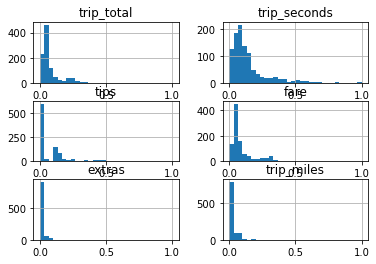

In [53]:
num_df_minmax_scaled[cols].hist(bins=30,stacked=False)

array([[<AxesSubplot:title={'center':'trip_total'}>,
        <AxesSubplot:title={'center':'trip_seconds'}>],
       [<AxesSubplot:title={'center':'tips'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'extras'}>,
        <AxesSubplot:title={'center':'trip_miles'}>]], dtype=object)

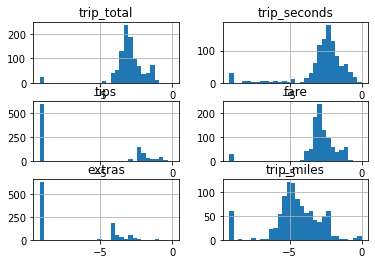

In [54]:
np.log(num_df_minmax_scaled[cols]+0.0001).hist(bins=30)

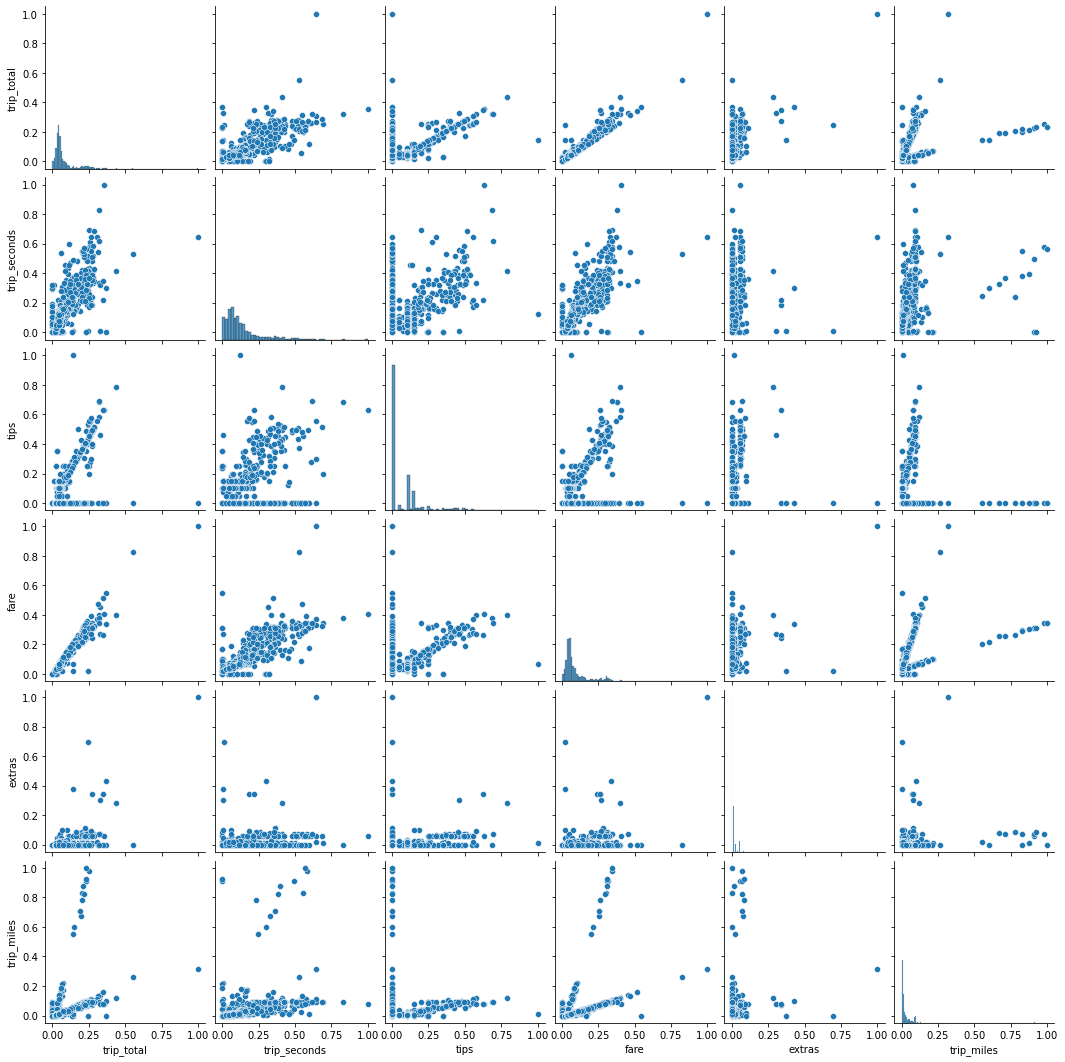

In [55]:
sns.pairplot(data=num_df_minmax_scaled)

## Standard Scaler

In [56]:
std_scaler=StandardScaler().fit(num_df[cols])
data_std_scaled=std_scaler.transform(num_df[cols])

In [57]:
num_df_std_scaled=pd.DataFrame(columns=num_df[cols].columns,data=data_std_scaled)
num_df_std_scaled.head()

,trip_total,trip_seconds,tips,fare,extras,trip_miles
0,-0.420296,-0.283049,0.157786,-0.502729,-0.272606,-0.312886
1,0.302116,0.164971,-0.590158,0.575241,-0.272606,0.046120
2,1.216188,2.703750,-0.590158,1.708022,-0.272606,0.341771
3,1.781143,1.733040,1.683593,1.598398,0.992062,0.288976
4,2.124362,0.911670,2.644701,1.872458,0.851544,0.468479


In [58]:
num_df_std_scaled.describe()

,trip_total,trip_seconds,tips,fare,extras,trip_miles
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.809308e-16,-1.453559e-16,-1.116884e-16,1.695866e-17,-8.115730e-17,-8.200385e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-9.652003e-01,-1.029749e+00,-5.901579e-01,-9.953067e-01,-2.726064e-01,-3.551219e-01
25%,-5.382403e-01,-5.972851e-01,-5.901579e-01,-5.575413e-01,-2.726064e-01,-3.023270e-01
50%,-3.613232e-01,-2.830489e-01,-5.901579e-01,-3.748346e-01,-2.726064e-01,-2.548116e-01
75%,6.622657e-02,1.649708e-01,1.577863e-01,8.284582e-02,8.431125e-03,-5.287095e-02
max,1.183122e+01,6.735928e+00,6.889284e+00,9.600954e+00,1.996209e+01,9.987404e+00


array([[<AxesSubplot:title={'center':'trip_total'}>,
        <AxesSubplot:title={'center':'trip_seconds'}>],
       [<AxesSubplot:title={'center':'tips'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'extras'}>,
        <AxesSubplot:title={'center':'trip_miles'}>]], dtype=object)

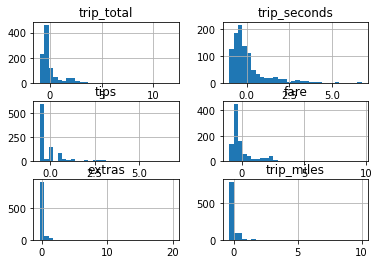

In [59]:
num_df_std_scaled[cols].hist(bins=30,stacked=False)

array([[<AxesSubplot:title={'center':'trip_total'}>,
        <AxesSubplot:title={'center':'trip_seconds'}>],
       [<AxesSubplot:title={'center':'tips'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'extras'}>,
        <AxesSubplot:title={'center':'trip_miles'}>]], dtype=object)

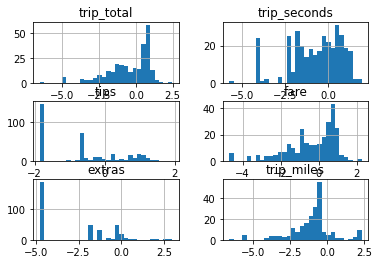

In [60]:
np.log(num_df_std_scaled[cols]+0.0001).hist(bins=30)

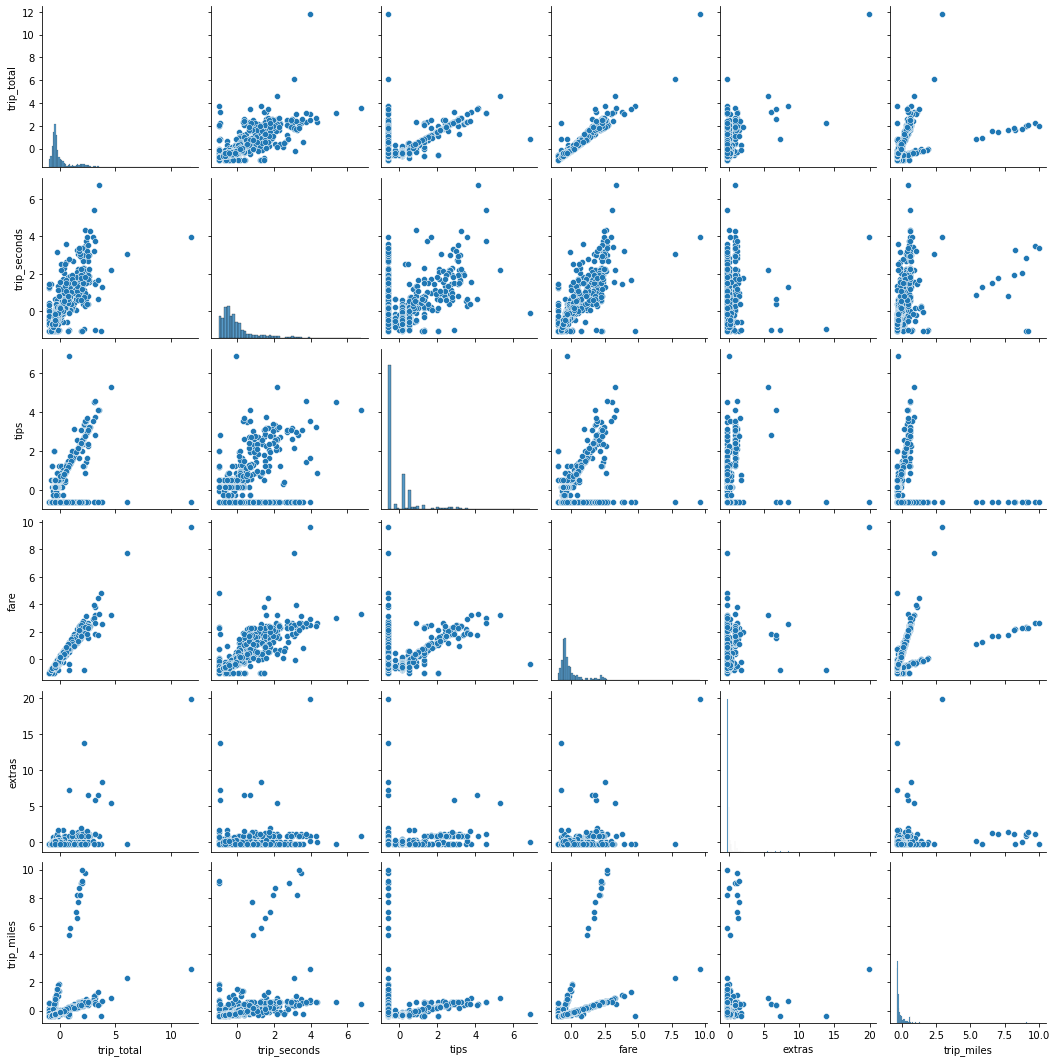

In [61]:
sns.pairplot(data=num_df_std_scaled)

_________________